<a href="https://www.kaggle.com/code/naveenapaleti/world-bank-gdp-by-country-continent?scriptVersionId=264019259" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# World Bank GDP by Country & Continent (2000–2024)

This notebook provides a comprehensive visual exploration of global GDP data from 2000 to 2025. The analysis includes interactive plots and charts to highlight key economic trends, country performance, and the impact of significant global events like the COVID-19 pandemic.

### Import Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 60)

CSV_PATH = "/kaggle/input/world-bank-gdp-by-country-and-continent20002025/gdp_2000_2025.csv" 

COVERAGE_THRESHOLD = 0.70
BASE_YEAR = 2000
LATEST_CAP_FOR_COMPARISONS = 2024
COVID_WINDOW = (2019, 2021)
PRE_COVID = (2015, 2019)
POST_COVID_TARGET = (2021, 2024)
GDP_UNIT_LABEL = "USD (billions)"

### Load Dataset

In [2]:
df = pd.read_csv(CSV_PATH)

df.head()

,Name of country,Continent,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Algeria,Africa,5.479040e+10,5.941340e+10,6.151610e+10,7.348226e+10,9.191368e+10,1.070466e+11,1.230843e+11,1.424827e+11,1.803838e+11,1.503173e+11,1.777851e+11,2.183319e+11,2.271437e+11,2.297014e+11,2.389427e+11,1.874939e+11,1.807638e+11,1.898809e+11,1.945545e+11,1.934597e+11,1.648734e+11,1.862312e+11,2.256385e+11,2.476262e+11,2.636198e+11,NaN
1,"Egypt, Arab Rep.",Africa,9.983854e+10,9.668464e+10,8.514607e+10,8.028846e+10,7.878247e+10,8.966034e+10,1.074261e+11,1.304378e+11,1.628182e+11,1.891470e+11,2.189837e+11,2.359897e+11,2.791167e+11,2.884341e+11,3.055954e+11,3.293666e+11,3.324417e+11,2.483628e+11,2.625886e+11,3.186788e+11,3.838178e+11,4.246718e+11,4.767477e+11,3.959261e+11,3.890599e+11,NaN
2,Libya,Africa,3.827095e+10,3.411209e+10,2.048189e+10,2.626562e+10,3.312231e+10,4.733469e+10,6.009423e+10,6.803298e+10,8.671077e+10,6.080856e+10,7.538083e+10,4.816926e+10,9.254094e+10,7.535111e+10,5.737236e+10,4.871750e+10,4.991207e+10,6.715745e+10,7.668603e+10,6.925450e+10,4.685429e+10,3.521800e+10,4.324630e+10,4.509646e+10,4.663628e+10,NaN
3,Morocco,Africa,4.301746e+10,4.383148e+10,4.707719e+10,5.802936e+10,6.611415e+10,6.885266e+10,7.588382e+10,8.694791e+10,1.018229e+11,1.011550e+11,1.008653e+11,1.100806e+11,1.069374e+11,1.157393e+11,1.191308e+11,1.104138e+11,1.115729e+11,1.185406e+11,1.273411e+11,1.289203e+11,1.213536e+11,1.420221e+11,1.309519e+11,1.444171e+11,1.544310e+11,NaN
4,Tunisia,Africa,2.147353e+10,2.206583e+10,2.314162e+10,2.745390e+10,3.118389e+10,3.227219e+10,3.437666e+10,3.891535e+10,4.485944e+10,4.345574e+10,4.620609e+10,4.812333e+10,4.731140e+10,4.868545e+10,5.027181e+10,4.577949e+10,4.436007e+10,4.216353e+10,4.268650e+10,4.190564e+10,4.249178e+10,4.707323e+10,4.494877e+10,4.819628e+10,5.340999e+10,NaN


In [3]:
for c in ["Name of country", "Continent"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()
df.drop_duplicates(inplace=True)

In [4]:
# Detect year columns
year_cols = sorted([int(c) for c in df.columns if str(c).isdigit() and 1900 <= int(c) <= 2100])
assert "Name of country" in df.columns, "Missing 'Name of country'"
assert "Continent" in df.columns, "Missing 'Continent'"
assert len(year_cols) > 0, "No year columns detected"

# Coerce numeric
for y in year_cols:
    df[str(y)] = pd.to_numeric(df[str(y)], errors="coerce")

In [5]:
YEAR_COLS_STR = [str(y) for y in year_cols]
df[YEAR_COLS_STR] = df[YEAR_COLS_STR] / 1_000_000_000  

In [6]:
COVERAGE_THRESHOLD = 0.70   

missing_by_year = df[YEAR_COLS_STR].isna().sum()
coverage_by_year = 1 - (missing_by_year / len(df))
coverage = pd.DataFrame({"Year": year_cols, "coverage_ratio": coverage_by_year.values, "missing": missing_by_year.values})
cov_ok = coverage[coverage["coverage_ratio"] >= COVERAGE_THRESHOLD]
latest_reliable_year = int(cov_ok["Year"].max()) if not cov_ok.empty else int(max(year_cols))

In [7]:
print("=== DATASET ===")
print("Rows, Cols:", df.shape)
print("Year Range:", min(year_cols), "→", max(year_cols))
print(f"Latest reliable year (≥{int(COVERAGE_THRESHOLD*100)}% coverage):", latest_reliable_year)

=== DATASET ===
Rows, Cols: (119, 28)
Year Range: 2000 → 2025
Latest reliable year (≥70% coverage): 2024


In [8]:
def latest_leq(year):
    cand = [y for y in year_cols if y <= year]
    return max(cand) if cand else max(year_cols)

In [9]:
df_long = df.melt(
    id_vars=["Name of country","Continent"],
    value_vars=YEAR_COLS_STR,
    var_name="Year",
    value_name="GDP_billions"
).sort_values(["Name of country","Year"])
df_long["Year"] = df_long["Year"].astype(int)

yr = latest_reliable_year
target_year = latest_leq(LATEST_CAP_FOR_COMPARISONS)

# Today’s leaders

We find the top economies in the latest reliable year

In [10]:
top5_current = (
    df[["Name of country","Continent", str(yr)]]
    .rename(columns={str(yr): f"GDP ({GDP_UNIT_LABEL})"})
    .dropna(subset=[f"GDP ({GDP_UNIT_LABEL})"])
    .sort_values(f"GDP ({GDP_UNIT_LABEL})", ascending=False)
    .head()
    .reset_index(drop=True)
)
print(f"\n=== Top 5 Countries by GDP in {yr} ({GDP_UNIT_LABEL}) ===")
print(top5_current.to_string(index=False))


=== Top 5 Countries by GDP in 2024 (USD (billions)) ===
Name of country     Continent  GDP (USD (billions))
  United States North America          29184.890000
          China          Asia          18743.803171
        Germany        Europe           4659.929337
          Japan          Asia           4026.210821
          India          Asia           3912.686169


#  The global pie

what share of global GDP each continent holds

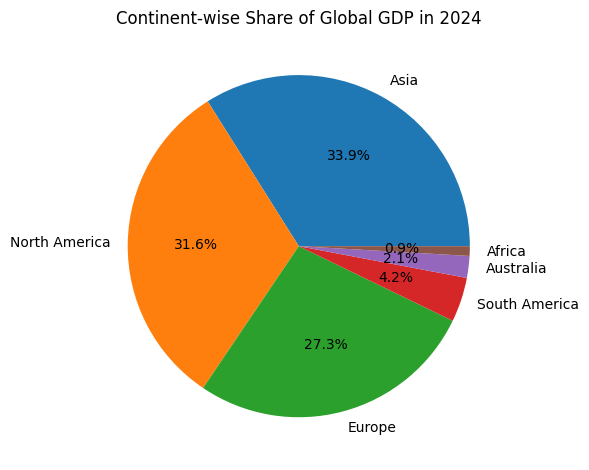

In [11]:
cont_share = (
    df[["Continent", str(yr)]].dropna(subset=[str(yr)])
    .groupby("Continent")[str(yr)].sum(min_count=1)
    .sort_values(ascending=False)
)
plt.figure()
plt.pie(cont_share.values, labels=cont_share.index, autopct="%1.1f%%")
plt.title(f"Continent-wise Share of Global GDP in {yr}")
plt.tight_layout()
plt.show()

# Big picture: how each continent evolved

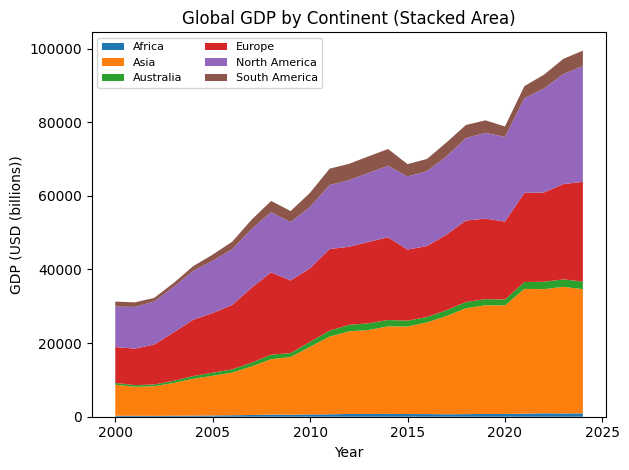

In [12]:
continent_ts = (
    df_long.groupby(["Continent","Year"])["GDP_billions"].sum(min_count=1)
    .reset_index()
    .pivot(index="Year", columns="Continent", values="GDP_billions")
    .sort_index()
)
plt.figure()
plt.stackplot(continent_ts.index.values, *[continent_ts[c].values for c in continent_ts.columns], labels=continent_ts.columns)
plt.title("Global GDP by Continent (Stacked Area)")
plt.xlabel("Year"); plt.ylabel(f"GDP ({GDP_UNIT_LABEL})")
plt.legend(loc="upper left", ncols=2, fontsize=8)
plt.tight_layout(); plt.show()

# Biggest winners (and losers) since 2000

Who added the most GDP since 2000? Who fell behind? We measure absolute change (not %), capped at ≤2024 for fairness.

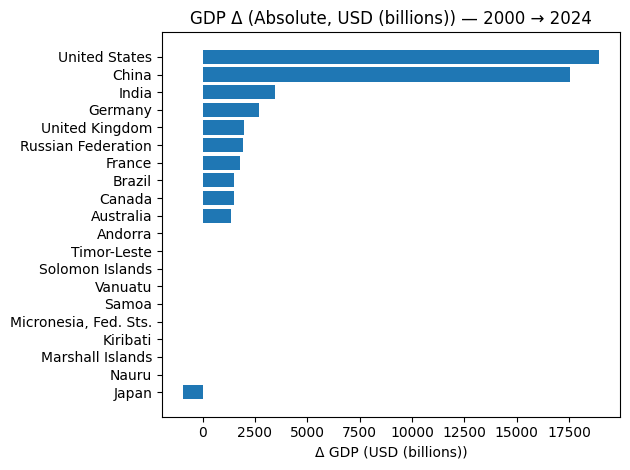

In [13]:
if BASE_YEAR not in year_cols:
    BASE_YEAR = min(year_cols)  # graceful fallback if 2000 missing

diffs = df[["Name of country","Continent", str(BASE_YEAR), str(target_year)]].dropna()
diffs["Delta_millions"] = diffs[str(target_year)] - diffs[str(BASE_YEAR)]

top10_gain = diffs.sort_values("Delta_millions", ascending=False).head(10)
top10_drop = diffs.sort_values("Delta_millions", ascending=True).head(10)

vals = pd.concat([top10_gain, top10_drop]).sort_values("Delta_millions")
plt.figure()
plt.barh(vals["Name of country"], vals["Delta_millions"])
plt.title(f"GDP Δ (Absolute, {GDP_UNIT_LABEL}) — {BASE_YEAR} → {target_year}")
plt.xlabel(f"Δ GDP ({GDP_UNIT_LABEL})")
plt.tight_layout()
plt.show()

In [14]:

print(f"\n=== Top 10 Δ Up ({BASE_YEAR}→{target_year}) — {GDP_UNIT_LABEL} ===")
print(top10_gain[["Name of country","Continent","Delta_millions"]].reset_index(drop=True).to_string(index=False))
print(f"\n=== Top 10 Δ Down ({BASE_YEAR}→{target_year}) — {GDP_UNIT_LABEL} ===")
print(top10_drop[["Name of country","Continent","Delta_millions"]].reset_index(drop=True).to_string(index=False))



=== Top 10 Δ Up (2000→2024) — USD (billions) ===
   Name of country     Continent  Delta_millions
     United States North America    18933.938000
             China          Asia    17520.048251
             India          Asia     3444.290647
           Germany        Europe     2692.948636
    United Kingdom        Europe     1978.299312
Russian Federation        Europe     1914.125664
            France        Europe     1801.120004
            Brazil South America     1523.963849
            Canada North America     1496.479815
         Australia     Australia     1336.025492

=== Top 10 Δ Down (2000→2024) — USD (billions) ===
      Name of country Continent  Delta_millions
                Japan      Asia     -942.148255
                Nauru Australia        0.133420
     Marshall Islands Australia        0.165519
             Kiribati Australia        0.232952
Micronesia, Fed. Sts. Australia        0.238153
                Samoa Australia        0.809169
              Vanuatu A

In [15]:
y2019 = 2019 if "2019" in df.columns else latest_leq(2019)
y2020 = 2020 if "2020" in df.columns else latest_leq(2020)
y2021 = 2021 if "2021" in df.columns else latest_leq(2021)

In [16]:
covid_years = [y for y in range(COVID_WINDOW[0], COVID_WINDOW[1]+1) if str(y) in df.columns]
covid_table = df[["Name of country","Continent"] + [str(y) for y in covid_years]].copy()
print("\n=== GDP During COVID (first 15 rows) — values in billions ===")
print(covid_table.head(15).to_string(index=False))


=== GDP During COVID (first 15 rows) — values in billions ===
     Name of country Continent         2019         2020         2021
             Algeria    Africa   193.459662   164.873415   186.231205
    Egypt, Arab Rep.    Africa   318.678815   383.817842   424.671765
               Libya    Africa    69.254496    46.854285    35.217996
             Morocco    Africa   128.920266   121.353645   142.022058
             Tunisia    Africa    41.905642    42.491781    47.073234
             Armenia      Asia    13.619291    12.641699    13.878909
          Azerbaijan      Asia    48.174235    42.693000    54.825412
          Bangladesh      Asia   351.231655   373.979442   416.271648
              Bhutan      Asia     2.735684     2.457604     2.768803
   Brunei Darussalam      Asia    13.469235    12.005800    14.006497
            Cambodia      Asia    36.685356    34.818074    36.790164
               China      Asia 14560.167101 14996.414167 18201.698720
              Cyprus      A

# COVID shock and recovery

We measure:

Shock = % drop from 2019 → 2020

Recovery time = years to regain your 2019 level

In [17]:
# Trough severity: % change 2019→2020
cov = df[["Name of country","Continent", str(y2019), str(y2020)]].dropna()
cov["Trough_%"] = (cov[str(y2020)] / cov[str(y2019)] - 1) * 100

# --- Recovery time: years to regain 2019 level (first year >= 2019 GDP) ---

# Safety: pick the best available 2019/2020 columns already computed
# y2019 and y2020 should already be defined earlier
# year_cols is the sorted list of int years detected in your dataset

def years_to_recover_from_row(row, base_year, start_year, year_list):
    """Given a full wide row (all years), return #years from start_year to first >= base_year value."""
    base = row.get(str(base_year), np.nan)
    if pd.isna(base):
        return np.nan
    for i, y in enumerate([yy for yy in year_list if yy >= start_year], start=1):
        v = row.get(str(y), np.nan)
        if pd.notna(v) and v >= base:
            return i
    return np.nan

# Build a fast lookup: country -> full wide row (first occurrence if duplicates)
row_by_country = {name: grp.iloc[0] for name, grp in df.groupby("Name of country", as_index=False)}

# Compute recovery years for *exactly* the countries in cov (keeps lengths aligned)
cov["Years_to_recover"] = cov["Name of country"].map(
    lambda name: years_to_recover_from_row(
        row_by_country.get(name, pd.Series(dtype=float)),
        base_year=y2019,
        start_year=y2020,
        year_list=year_cols
    )
)


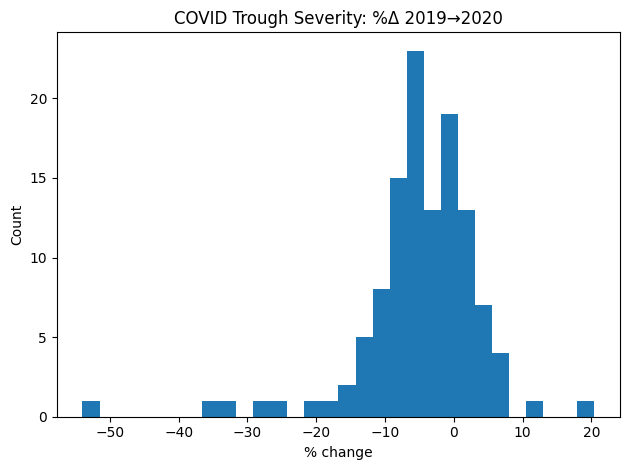

In [18]:
# Visuals: trough distribution, worst drops, fastest recovery
vals = cov["Trough_%"].dropna()
plt.figure()
plt.hist(vals, bins=30)
plt.title(f"COVID Trough Severity: %Δ {y2019}→{y2020}")
plt.xlabel("% change")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

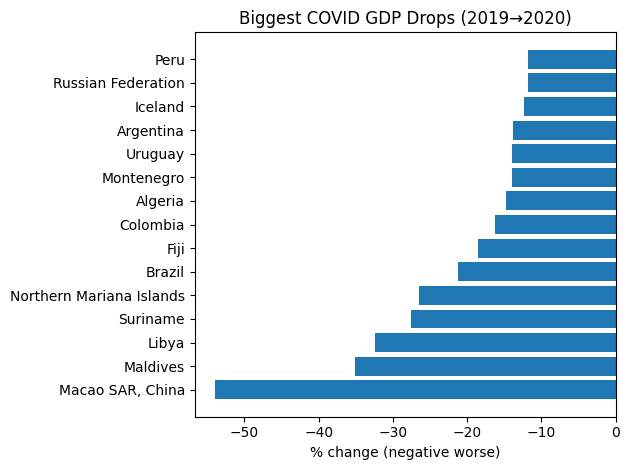

In [19]:
biggest_drops = cov.sort_values("Trough_%").head(15)
plt.figure()
plt.barh(biggest_drops["Name of country"], biggest_drops["Trough_%"])
plt.title(f"Biggest COVID GDP Drops ({y2019}→{y2020})")
plt.xlabel("% change (negative worse)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Growth before vs after COVID

We compare CAGR (annualized growth):

Pre-COVID: 2015 → 2019

Post-COVID: 2021 → latest available ≤ 2024

In [20]:
pre_start, pre_end = PRE_COVID
post_start, post_end_target = POST_COVID_TARGET
post_end_candidates = [y for y in year_cols if post_start <= y <= post_end_target]
post_end = max(post_end_candidates) if post_end_candidates else latest_leq(post_start)

def safe_cagr(v0, v1, n_years):
    if pd.isna(v0) or pd.isna(v1) or v0 <= 0 or n_years <= 0:
        return np.nan
    return (v1 / v0)**(1/n_years) - 1

rates_records = []
for _, row in df.iterrows():
    pre  = safe_cagr(row.get(str(pre_start), np.nan),  row.get(str(pre_end), np.nan),  pre_end - pre_start)
    post = safe_cagr(row.get(str(post_start), np.nan), row.get(str(post_end), np.nan), post_end - post_start)
    rates_records.append([row["Name of country"], row["Continent"], pre, post])

rates = pd.DataFrame(rates_records, columns=["Name of country","Continent","CAGR_pre","CAGR_post"])
rates["CAGR_pre_pct"] = (rates["CAGR_pre"]*100).round(2)
rates["CAGR_post_pct"] = (rates["CAGR_post"]*100).round(2)
rates["Delta_pct_pts"] = ((rates["CAGR_post"] - rates["CAGR_pre"])*100).round(2)

# Continent slope chart (mean pre vs post)
cont_pre  = rates.groupby("Continent")["CAGR_pre"].mean()
cont_post = rates.groupby("Continent")["CAGR_post"].mean()
cont_reg = pd.concat([cont_pre.rename("pre"), cont_post.rename("post")], axis=1).dropna()

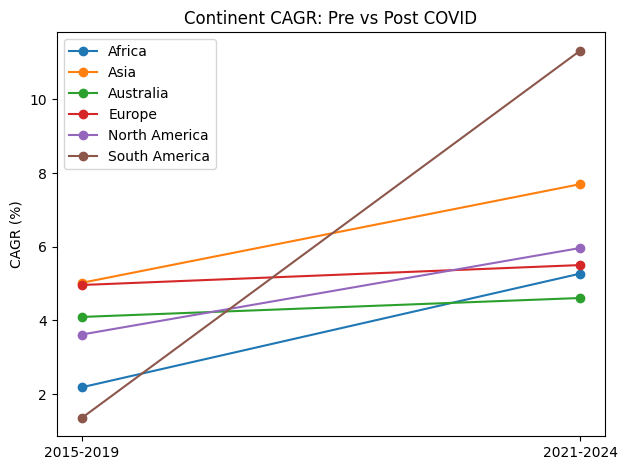

In [21]:
fig, ax = plt.subplots()
x = [-1,1]
for k, row in cont_reg.iterrows():
    ax.plot(x, [row["pre"]*100, row["post"]*100], marker="o", label=k)
    # ax.text(-0.02, row["pre"]*100, k, ha="right", va="center")
ax.set_xticks(x); ax.set_xticklabels([f"{pre_start}-{pre_end}", f"{post_start}-{post_end}"])
ax.set_title("Continent CAGR: Pre vs Post COVID")
ax.set_ylabel("CAGR (%)")
ax.legend()
plt.tight_layout()
plt.show()

In [22]:
print("\n=== Pre vs Post COVID Growth (sample 10) — % ===")
print(rates[["Name of country","Continent","CAGR_pre_pct","CAGR_post_pct","Delta_pct_pts"]].head(10).to_string(index=False))


=== Pre vs Post COVID Growth (sample 10) — % ===
  Name of country Continent  CAGR_pre_pct  CAGR_post_pct  Delta_pct_pts
          Algeria    Africa          0.79          12.28          11.50
 Egypt, Arab Rep.    Africa         -0.82          -2.88          -2.06
            Libya    Africa          9.19           9.81           0.62
          Morocco    Africa          3.95           2.83          -1.12
          Tunisia    Africa         -2.19           4.30           6.49
          Armenia      Asia          6.58          22.94          16.35
       Azerbaijan      Asia         -2.39          10.67          13.06
       Bangladesh      Asia         15.83           2.64         -13.19
           Bhutan      Asia          5.75            NaN            NaN
Brunei Darussalam      Asia          1.03           3.35           2.33


# Who’s steady? Who’s “lumpy”?

We look at volatility: the standard deviation of year-over-year growth.

In [23]:
# ============================================================
# 6) VOLATILITY RADAR (YoY Std Dev)
# ============================================================
wide = df_long.pivot_table(index=["Name of country","Continent"], columns="Year", values="GDP_billions")
wide = wide.sort_index(axis=1)
yoy = wide.pct_change(axis=1)
vol = yoy.std(axis=1, skipna=True).rename("YoY_vol").reset_index()

top_lumpy  = vol.sort_values("YoY_vol", ascending=False).head(15)
top_steady = vol.sort_values("YoY_vol", ascending=True).head(15)

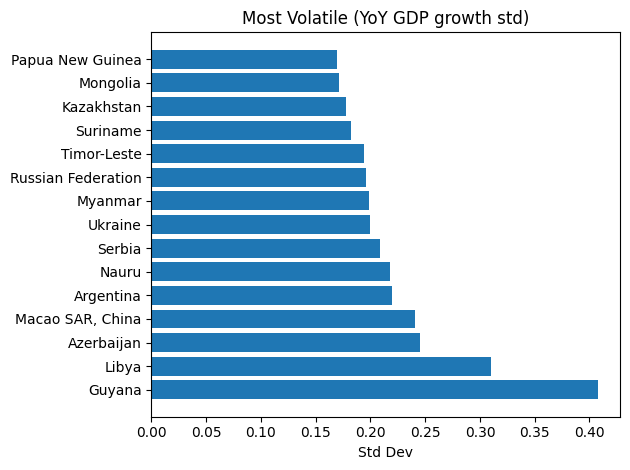

In [24]:
plt.figure()
plt.barh(top_lumpy["Name of country"], top_lumpy["YoY_vol"])
plt.title("Most Volatile (YoY GDP growth std)"); plt.xlabel("Std Dev")
plt.tight_layout()
plt.show()

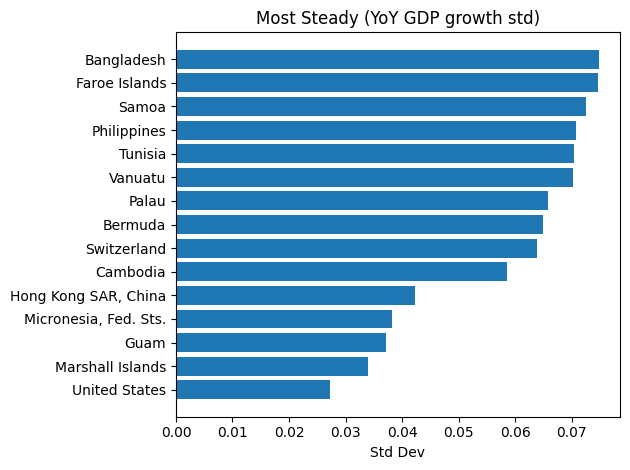

In [25]:
plt.figure()
plt.barh(top_steady["Name of country"], top_steady["YoY_vol"])
plt.title("Most Steady (YoY GDP growth std)"); plt.xlabel("Std Dev")
plt.tight_layout()
plt.show()

# Is world GDP concentrated in a few countries?

We track a simple Gini measure over time: higher = more concentrated.

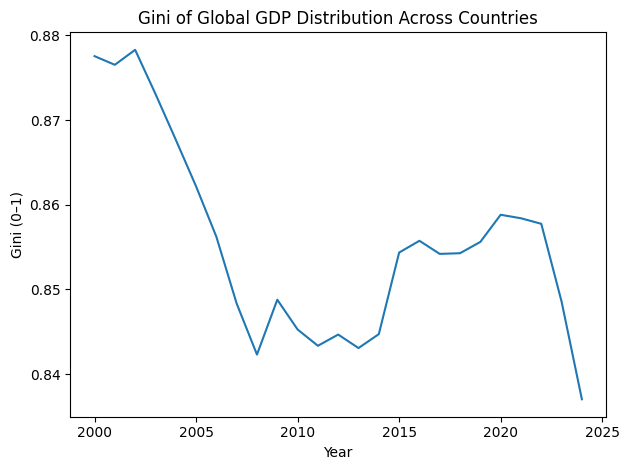

In [26]:
def gini(arr):
    z = arr[~np.isnan(arr)]
    if len(z) == 0:
        return np.nan
    z = np.sort(z)
    s = z.sum()
    if s <= 0:
        return np.nan
    cum = np.cumsum(z)
    n = len(z)
    return 1 + (1/n) - 2 * (cum.sum() / (s * n))

gini_series = df_long.groupby("Year")["GDP_billions"].apply(lambda s: gini(s.values)).sort_index()
plt.figure()
plt.plot(gini_series.index.values, gini_series.values)
plt.title("Gini of Global GDP Distribution Across Countries")
plt.xlabel("Year")
plt.ylabel("Gini (0–1)")
plt.tight_layout()
plt.show()

# Continent share heatmap (who’s gaining footprint?)

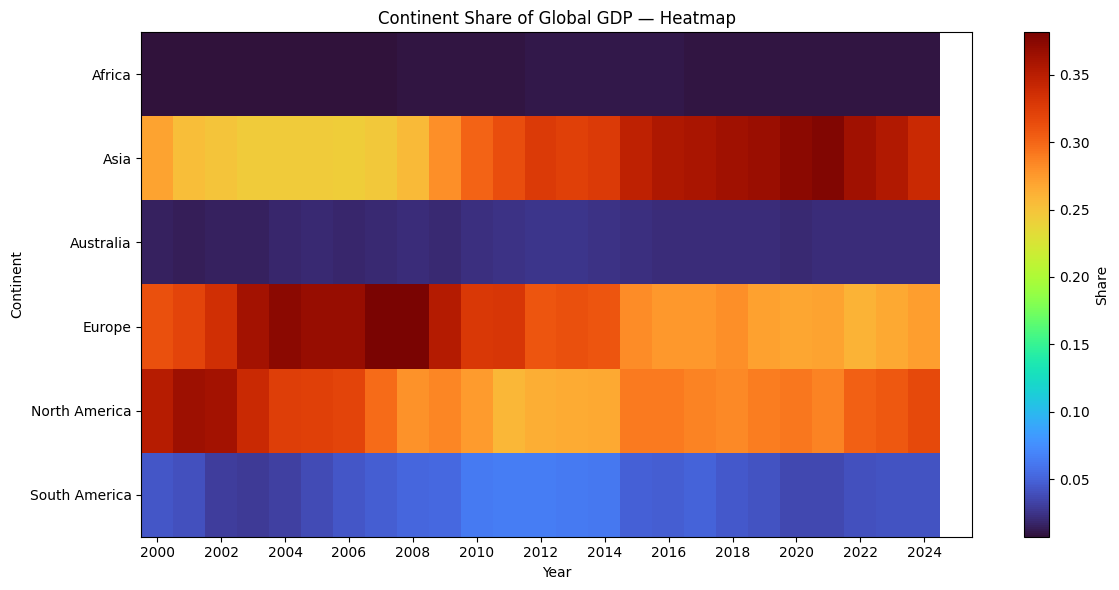

In [27]:
cont_year = (
    df_long.groupby(["Continent","Year"])["GDP_billions"].sum(min_count=1)
    .unstack(0).sort_index()
)
share = cont_year.div(cont_year.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
plt.imshow(share.T.values, aspect="auto", interpolation="nearest", cmap='turbo')
plt.title("Continent Share of Global GDP — Heatmap")
plt.xlabel("Year")
plt.ylabel("Continent")
plt.yticks(ticks=range(len(share.columns)), labels=share.columns)
step = max(1, len(share.index)//10)
plt.xticks(ticks=range(0, len(share.index), step), labels=share.index[::step])
plt.colorbar(label="Share")
plt.tight_layout()
plt.show()

# Quick sparklines for the top economies

A fast way to “see the shape” of the top 12 economies.

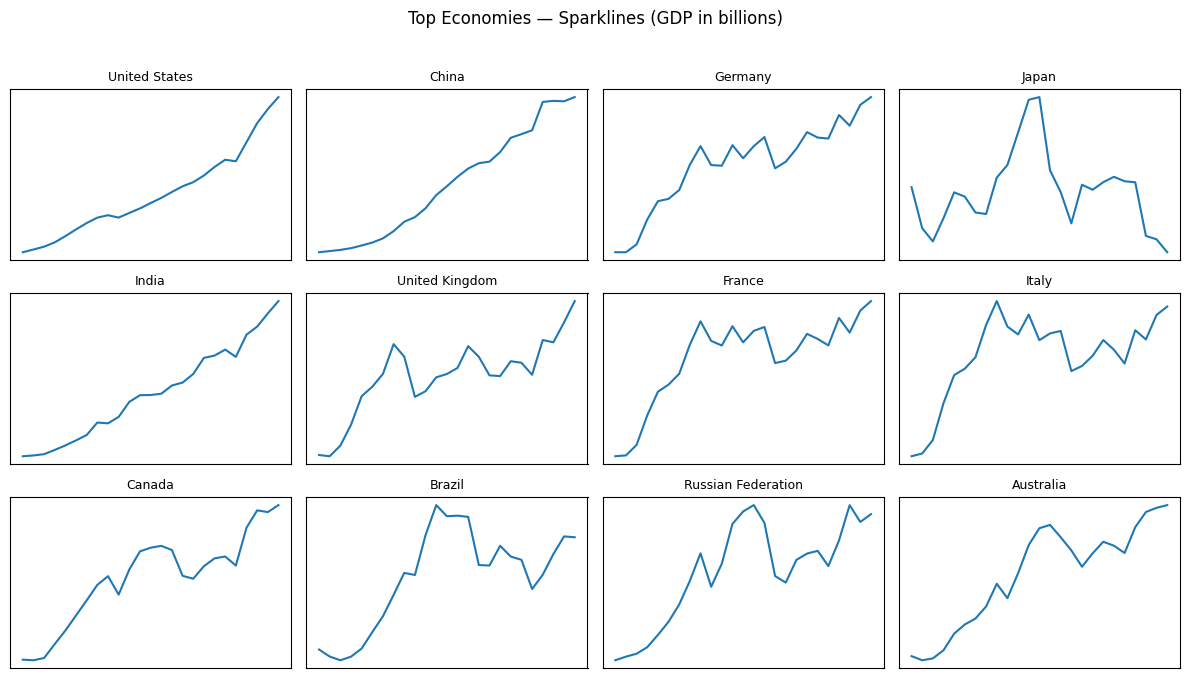

In [28]:
N = 12
leaders = (
    df[["Name of country", str(yr)]].dropna()
    .sort_values(str(yr), ascending=False)
    .head(N)["Name of country"].tolist()
)
ncols = 4
nrows = int(np.ceil(N / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 2.2*nrows))
axes = axes.flatten()

for i, country in enumerate(leaders):
    s = df_long[df_long["Name of country"] == country].set_index("Year")["GDP_billions"].sort_index()
    axes[i].plot(s.index.values, s.values)
    axes[i].set_title(country, fontsize=9)
    axes[i].set_xticks([]); axes[i].set_yticks([])
for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Top Economies — Sparklines (GDP in billions)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# Global context line (the big trend)

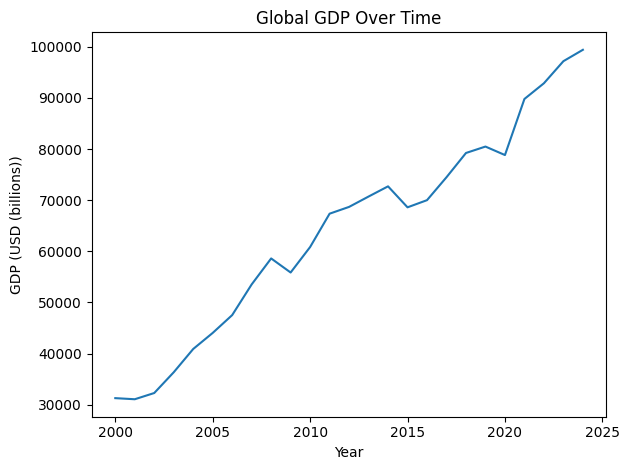

In [29]:
global_ts = df_long.groupby("Year")["GDP_billions"].sum(min_count=1).rename("Global_GDP_billions").reset_index()
plt.figure()
plt.plot(global_ts["Year"], global_ts["Global_GDP_billions"])
plt.title("Global GDP Over Time")
plt.xlabel("Year"); plt.ylabel(f"GDP ({GDP_UNIT_LABEL})")
plt.tight_layout(); plt.show()


# Glossary (plain English)

- **GDP (current US$)**: The total value of everything an economy produces, measured in dollars of that year (not inflation-adjusted).
- **Coverage**: How many countries have data for a given year. We call a year “reliable” when ≥70% of countries have data.
- **Absolute change (Δ)**: The difference in GDP between two years (not a percentage).
- **CAGR**: “Compound Annual Growth Rate” — average yearly growth over a period.
- **Volatility**: How bumpy growth is year to year.
- **Gini (here)**: A simple indicator of how concentrated world GDP is across countries (0 = very even, 1 = very concentrated).